In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [88]:
loaded_model = tf.keras.models.load_model('./saved')

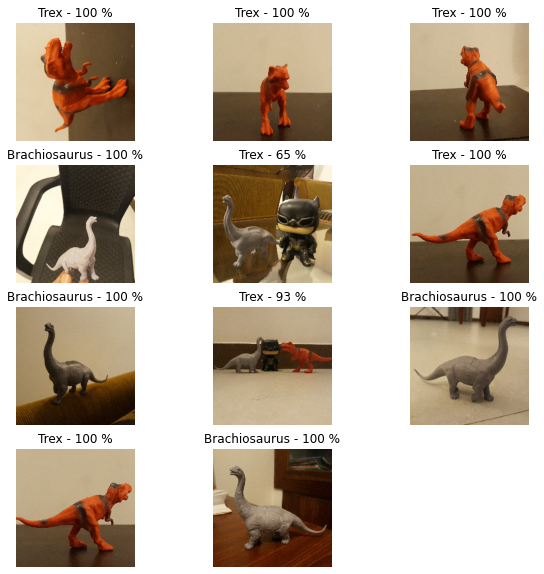

In [92]:
test_dir = pathlib.Path('Test')
dino_paths = list(test_dir.glob('*.jpg'))
class_names = ['Brachiosaurus', 'Trex']

plt.figure(figsize=(10, 10))

for i, dino_path in enumerate(dino_paths):
    dino_img = keras.preprocessing.image.load_img(dino_path, target_size=(216, 216))
    img_arr = keras.preprocessing.image.img_to_array(dino_img)
    img_arr = tf.expand_dims(img_arr, 0)
    
    predictions = loaded_model.predict(img_arr)
    
    score = tf.nn.softmax(predictions[0])
    percent = int(round(100*np.max(score), 0))
    title = "{} - {} %".format(class_names[np.argmax(score)], percent)
    
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(dino_img)
    plt.title(title)
    plt.axis("off")
       
    